In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = "traffic_accidents.csv"  # Asegúrate de colocar la ruta correcta del archivo
df = pd.read_csv(file_path)

# Mostrar las primeras filas para exploración inicial
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [16]:
# Resumen de tipos de variables
types_summary = df.dtypes.value_counts()

# Conteo de valores nulos por columna
missing_values = df.isnull().sum()

# Total de registros y porcentaje de valores nulos por columna
total_records = len(df)
missing_percentage = (missing_values / total_records) * 100

# Número de valores únicos por columna
unique_values = df.nunique()

# Crear un DataFrame resumen
summary_df = pd.DataFrame({
    "Tipo de Dato": df.dtypes,
    "Valores Nulos": missing_values,
    "Porcentaje Nulos": missing_percentage,
    "Valores Únicos": unique_values
}).sort_values(by="Valores Nulos", ascending=False)

# Mostrar el resumen
summary_df


,Tipo de Dato,Valores Nulos,Porcentaje Nulos,Valores Únicos
crash_date,object,0,0.0,189087
traffic_control_device,object,0,0.0,19
crash_day_of_week,int64,0,0.0,7
crash_hour,int64,0,0.0,24
injuries_no_indication,float64,0,0.0,39
injuries_reported_not_evident,float64,0,0.0,13
injuries_non_incapacitating,float64,0,0.0,19
injuries_incapacitating,float64,0,0.0,8
injuries_fatal,float64,0,0.0,4
injuries_total,float64,0,0.0,19


In [17]:
# Calcular estadísticas descriptivas para columnas numéricas
stats_summary = df.describe().transpose()

# Calcular el rango intercuartílico (IQR), límite inferior y superior para detección de valores atípicos
stats_summary["IQR"] = stats_summary["75%"] - stats_summary["25%"]
stats_summary["Lower IQR"] = stats_summary["25%"] - 1.5 * stats_summary["IQR"]
stats_summary["Upper IQR"] = stats_summary["75%"] + 1.5 * stats_summary["IQR"]

# Mostrar el resumen estadístico con IQRs
stats_summary



,count,mean,std,min,25%,50%,75%,max,IQR,Lower IQR,Upper IQR
num_units,209306.0,2.063300,0.396012,1.0,2.0,2.0,2.0,11.0,0.0,2.0,2.0
injuries_total,209306.0,0.382717,0.799720,0.0,0.0,0.0,1.0,21.0,1.0,-1.5,2.5
injuries_fatal,209306.0,0.001859,0.047502,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
injuries_incapacitating,209306.0,0.038102,0.233964,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
injuries_non_incapacitating,209306.0,0.221241,0.614960,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0
injuries_reported_not_evident,209306.0,0.121516,0.450865,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0
injuries_no_indication,209306.0,2.244002,1.241175,0.0,2.0,2.0,3.0,49.0,1.0,0.5,4.5
crash_hour,209306.0,13.373047,5.603830,0.0,9.0,14.0,17.0,23.0,8.0,-3.0,29.0
crash_day_of_week,209306.0,4.144024,1.966864,1.0,2.0,4.0,6.0,7.0,4.0,-4.0,12.0
crash_month,209306.0,6.771822,3.427593,1.0,4.0,7.0,10.0,12.0,6.0,-5.0,19.0


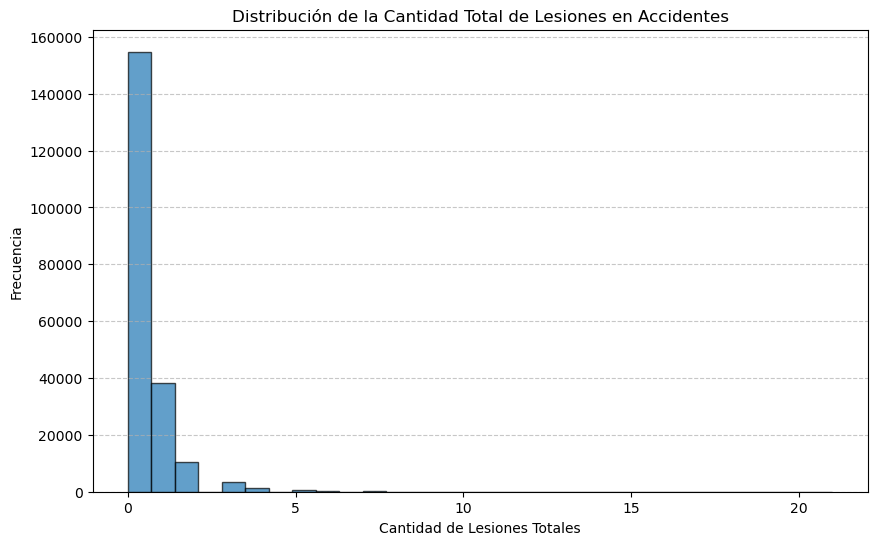

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df["injuries_total"].dropna(), bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Cantidad de Lesiones Totales")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Cantidad Total de Lesiones en Accidentes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


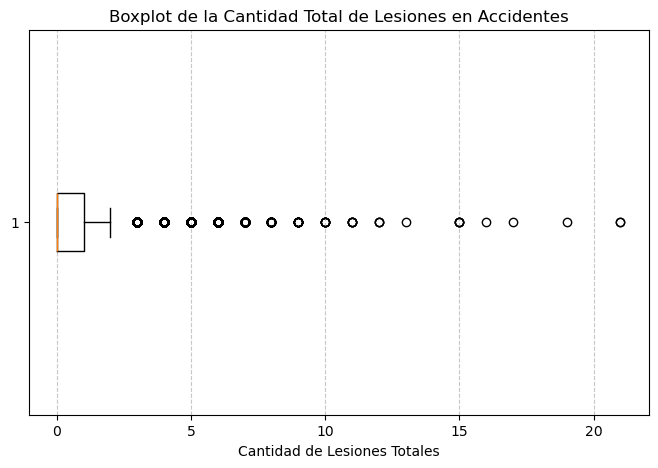

In [19]:
plt.figure(figsize=(8, 5))
plt.boxplot(df["injuries_total"].dropna(), vert=False)
plt.xlabel("Cantidad de Lesiones Totales")
plt.title("Boxplot de la Cantidad Total de Lesiones en Accidentes")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [20]:
# Filtrar posibles valores atípicos según el IQR
outliers = df[(df["injuries_total"] < stats_summary.loc["injuries_total", "Lower IQR"]) |
              (df["injuries_total"] > stats_summary.loc["injuries_total", "Upper IQR"])]

# Mostrar algunos valores atípicos detectados
outliers.head()


,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
17,09/05/2023 07:05:00 PM,TRAFFIC SIGNAL,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,INCAPACITATING INJURY,3.0,0.0,1.0,2.0,0.0,2.0,19,3,9
73,09/22/2023 10:46:00 PM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,INCAPACITATING INJURY,5.0,0.0,5.0,0.0,0.0,0.0,22,6,9
81,10/08/2023 02:15:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,2,1,10
95,11/08/2022 08:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,3.0,0.0,0.0,3.0,0.0,1.0,8,3,11
